<a href="https://colab.research.google.com/github/Tankama/Julia/blob/main/A_B_TESTING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A/B TESTING

tqdm is a Python library used to display progress bars in loops or iterative tasks. It's particularly helpful for tracking the progress of long-running processes, such as data loading, file processing, or training machine learning models. The name tqdm stands for "taqaddum," which means "progress" in Arabic.


pmdarima is a Python library that simplifies time series forecasting using Auto-ARIMA (Auto-Regressive Integrated Moving Average). It automates the process of identifying the optimal ARIMA model parameters by performing grid searches over different values of p, d, and q (the ARIMA model hyperparameters). This library helps in efficiently forecasting univariate time series data without manually tuning the ARIMA parameters.

In [1]:
!pip install tqdm pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.1 MB/s eta 0:00:00


In [2]:
!pip install skillsnetwork

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 6.6 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 60.5 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.9
    Uninstalling widgetsnbextension-3.6.9:
      Successfully uninstalled widgetsnbextension-3.6.9
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


 statsmodels.stats.api as sms:


statsmodels is a Python library for statistical modeling. It provides tools for estimating and testing statistical models, including linear regression, time series analysis, generalized linear models, and more.
The statsmodels.stats.api module, which you've imported as sms, focuses specifically on statistical tests and utilities. These include:
Hypothesis testing.
Confidence intervals.
Test for proportions.
Power analysis.
Descriptive statistics

The math module is a built-in Python library that provides mathematical functions.
ceil(x) is a specific function that rounds a number up to the nearest integer.



In [4]:
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import skillsnetwork
from math import ceil
import statsmodels.stats.api as sms

In [6]:
await skillsnetwork.download_dataset('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX022OEN/ab_data.csv')
pd.read_csv('ab_data.csv')

Saved as 'ab_data.csv'


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [7]:
df=pd.read_csv('/content/ab_data.csv')
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [11]:
df['version']=np.where(df['landing_page']=='new_page','dark_mode','light_mode')
df.head(5)

,user_id,timestamp,group,landing_page,converted,version
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,light_mode
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,light_mode
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,dark_mode
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,dark_mode
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,light_mode


In A/B tests, to test whether a variant is efficient or not, the users are separated into two groups: the treatment group and control group. The treatment group receives the change or the treatment, and the control group does not.

From the output below, roughly half of the users are in the control group and the other half receive the treatment.


In our study, the treatment group gets the new page in dark mode, and the control group stays with the old page or the light mode. We should expect the number of people who get the new page to be equal to the number of people who receive the treatment. Similarly, we expect the number of users that get the old page be equal to the number of people who are in the control group.

In [13]:
df['group'].value_counts()

,count
group,
treatment,147276
control,147202


In [14]:
df['landing_page'].value_counts()

,count
landing_page,
old_page,147239
new_page,147239


Unfortunately, the results do not match. We will be able to clean the data set in the upcoming steps.

we have to collect the mean of the old pages that has the light mode
and the new pages that has the dark mode interms of converted

the users who have converted into a website in darkmode and lightmode mean value

In [19]:
old_page_conversion=df[df['version']=='light_mode']
new_page_conversion=df[df['version']=='dark_mode']

mean_oldpage=old_page_conversion['converted'].mean()
mean_newpage=new_page_conversion['converted'].mean()

print("the old page lightmode %.2f%%" % (100 * mean_oldpage))
print("the new page darkmode %.2f%%" % (100 * mean_newpage))

the old page lightmode 12.05%
the new page darkmode 11.88%


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
 5   version       294478 non-null  object
dtypes: int64(2), object(4)
memory usage: 13.5+ MB


##  DESIGNING THE EXPERIMENT

What is hypothesis testing?
In Statistics, hypothesis testing is a method used in statistical inference to test an assumption about a parameter.

The null hypothesis  𝐻0
  is an assumption we would like to test about a population. Often, this is where we test about the absence of the effect.

The alternative hypothesis  𝐻1
  or  𝐻𝐴
  claims that there is an effect on the population.

Here is an example:

Suppose you wish to see whether a coin is fair by flipping it 10 times. After flipping the coin 10 times, you get the following result: [H, H, H, H, T, H, H, H, H, H] where H is heads and T is tails. You do a hypothesis testing to see how probable it was to see that result under the null hypothesis. Let's set our level of significance to be 5%.

𝐻0:The coin is fair𝐻1:The coin is not fair
Since each of the flips is independent, the coin is represented as a Bernoulli distribution, where  𝑝
  is the probability of flipping Heads. Under the null hypothesis, the coin is fair. Therefore the probability of flipping Heads is  𝑝=0.5
  The probability of observing 1 tails and 9 heads is:

(10/9)𝑝8(1−𝑝)2=(10/9)(0.5)8(1−0.5)2=(10/9)(0.5)10=0.009765625
  The probability of observing 9 heads in our flips under the assumption that the coin is fair is 0.009765625. Observing that result was not very probable under the null hypothesis.

From our result, the probability of flipping heads is $\frac{9}{10} = 0.9$.

The critical z-score when the level of significance is 5% is -1.96 and 1.96. Let's derive how many heads, denoted by $n\hat{p}$ we should've seen:
$$
-1.96 \leq \frac{n\hat{p} - np_0}{\sqrt{np_0(1-p_0)}} \leq 1.96 \\\\\\
-1.96 \leq \frac{n\hat{p} - 10*0.5}{\sqrt{10*0.5(0.5)}} \leq 1.96 \\\\
-1.96 \leq \frac{n\hat{p} - 5}{\sqrt{2.5}} \leq 1.96 \\\\
-3.099 \leq n\hat{p} - 5 \leq 3.099 \\\\
2.099 \leq n\hat{p}\leq 8.099
$$


This shows that observing 9 heads in the result is highly not probable. We should've seen more than 2, less than 8 heads. We can reject the null hypothesis since we have evidence against it. The coin was probably not fair.

# VIEWING THE DATA

In [21]:
df.head(5)

,user_id,timestamp,group,landing_page,converted,version
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,light_mode
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,light_mode
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,dark_mode
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,dark_mode
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,light_mode


In [30]:
df['user_id'].count()

294478

In [27]:
user_Sessions=df['user_id'].value_counts()
users=user_Sessions[user_Sessions>1].count()

users

3894

the no of users who are repeated is calculated above remove the no of repeated users

The ~ symbol in Python is the bitwise NOT operator, and when used in pandas, it inverts boolean values. In your example:

acess the index and remove the duplicates

In [32]:
dr=user_Sessions[user_Sessions>1].index
df=df[~df['user_id'].isin(dr)]
df.head(10)


,user_id,timestamp,group,landing_page,converted,version
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,light_mode
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,light_mode
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,dark_mode
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,dark_mode
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,light_mode
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,light_mode
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,dark_mode
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,light_mode
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,dark_mode
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,dark_mode


In [33]:
df.shape[0]

286690

Our data contains 286,690 rows, which is not little. There are instances where datasets extend into the millions, presenting a considerable challenge in terms of both time and space for conducting testing. We can derive conclusive insights by working with a sample of our data. However, determining the optimal sample size from the outset may not be immediately evident.

However, we do know:

𝛼=5%

The power is the test is usually set to  1−𝛽=80%

effect size:  2%

Usually, a good baseline conversion rate falls within the range of  10−15%
 , let's use  13%
  as our baseline conversion rate in this case. Moreover, our team anticipates a conversion rate of  15%
 , thereby justifying the chosen effect size of  2%
 .

Fortunately, Python facilitates this process seamlessly through the statsmodel library!

### A refresher on levels of significance, type I and II errors
    
The level of significance represents the likelihood of observing your results under the assumption that the null hypothesis is true. Essentially, it quantifies the probability of committing a type I error.

A type I error occurs when we fail to reject the null hypothesis despite it being false. In simpler terms, this is akin to making a false positive conclusion.

Conversely, a type II error, referred to as a false negative conclusion, occurs when we incorrectly reject the null hypothesis when it is, in fact, true. The probability of making a false negative conclusion is denoted as $\beta$.
    
<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IND-GPXX0K4XEN/Screenshot%202024-01-23%20at%201.57.02%E2%80%AFPM.png" width="50%" alt="iris image">

<font color=gray>*Image Resource* :</font> <a href="https://medium.com/geekculture/which-is-worse-type-i-or-type-ii-errors-f40a0f040fcc">here</a>

In [34]:
effect=sms.proportion_effectsize(0.13,0.15)
effect_size = sms.proportion_effectsize(0.13, 0.15)

sample_size = sms.NormalIndPower().solve_power(
    effect_size,
    power = 0.8,
    alpha = 0.05,
    ratio = 1
)

sample_size = ceil(sample_size)

sample_size

4720

In [35]:
# The treatment and control samples
trt_sample = df[df['group']=='treatment'].sample(n=sample_size, random_state=888)

con_sample = df[df['group'] == 'control'].sample(n=sample_size, random_state=0)

# Combining into one dataframe and resetting the indices
df = pd.concat([con_sample, trt_sample], axis=0)
df.reset_index(drop=True, inplace=True)

df.sample(5)

,user_id,timestamp,group,landing_page,converted,version
6438,852355,2017-01-21 13:09:05.105606,treatment,new_page,0,dark_mode
7747,733686,2017-01-16 08:10:10.013543,treatment,new_page,0,dark_mode
3801,903820,2017-01-21 03:36:08.059087,control,old_page,0,light_mode
1763,878923,2017-01-16 19:30:51.834271,control,old_page,0,light_mode
6095,842260,2017-01-04 07:52:25.830906,treatment,new_page,0,dark_mode


In [36]:
df.groupby(['group','version']).agg({'converted': 'mean'})

,,converted
group,version,
control,light_mode,0.111017
treatment,dark_mode,0.125000


<ipython-input-38-a0024a4bfe56>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = df['version'], y = df['converted'], palette = ['blue', 'purple'], ci = False)
<ipython-input-38-a0024a4bfe56>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['version'], y = df['converted'], palette = ['blue', 'purple'], ci = False)


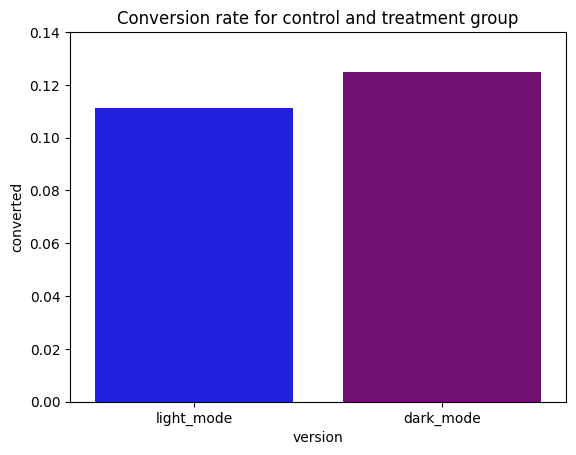

In [38]:
sns.barplot(x = df['version'], y = df['converted'], palette = ['blue', 'purple'], ci = False)
plt.ylim(0, 0.14)
plt.title('Conversion rate for control and treatment group')
plt.show()

In [39]:
conv_cont = df[df['group'] =='control']['converted']

conv_trt = df[df['group'] =='treatment']['converted']

n_cont = conv_cont.count()

n_trt = conv_trt.count()

num_converted = [conv_cont.sum(), conv_trt.sum()]

nobs = [n_cont, n_trt]

# p-value?
z_stat, pval = sms.proportions_ztest(num_converted, nobs=nobs)

pval

0.03524195278525257